<a href="https://colab.research.google.com/github/AlvaroBecker/CodingDojoTareas-/blob/main/matriz_de_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La tarea para este ejercicio es crear una matriz de confusión visualizada como un mapa de calor. 

Utilicen los resultados de los tres modelos que crearon en el ejercicio del árbol de clasificación basándose en el conjunto de datos de cáncer de mama como base de la matriz de confusión.  Los datos para este ejercicio se encuentran aquí.  El vector objetivo es el diagnóstico como maligno (M) o benigno (B).  

Sklearn permite crear una matriz de confusión muy fácil.  En primer lugar, importen el matriz de confusión como se muestra:

From sklearn.metrics import plot_confusion_matrix

Nota: Este es solo un ejemplo de cómo se debería ver el código y la salida para un modelo instanciado como “modelo”.

Para este ejercicio, pueden responder las preguntas sobre sus árboles de clasificación (aunque es posible que quieran ver los resultados del clasificador bagging y del bosque aleatorio para ver cómo se comparan)

1) ¿Cuál fue la precisión del modelo? (Ya deberían haber determinado esto en el ejercicio de árbol de clasificación)

Creen la matriz de confusión para responder las siguientes preguntas:

2) ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

3) ¿Cuántos falsos positivos había?

4) ¿Cuántos falsos negativos había?

5) Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.  

In [53]:
url='https://drive.google.com/file/d/1Zms1RfgkWrTp7S6_BFpeELYyvX1s2FSN/view'

In [54]:
def format_drive_url(url):
    file_id = url.split('/')[-2]
    download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
    return download_url

In [55]:
import pandas as pd
df=pd.read_csv(format_drive_url(url))

Esta tarea utiliza el conjunto de datos del cáncer de mama que se puede encontrar aquí.  El vector objetivo es el diagnóstico como maligno (M) o benigno (B).  

La tarea es usar un 

1) clasificador del árbol de decisión 

2) clasificador bagging y un 

3) clasificador de bosque aleatorio 

para obtener la exactitud más alta posible en el conjunto de prueba. 

Pueden ver los capítulos anteriores para repasar los conceptos de bagging y bosque aleatorio como se explicaron con la regresión. Se ven muy similares en un problema de clasificación, pero la predicción final es un voto de mayoría de qué clase en lugar de un promedio de valores continuos.  

El siguiente código se puede utilizar para importar los modelos de árboles de clasificación requeridos:

 
---

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [58]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
y=df['diagnosis']
X=df.drop(columns=['id','diagnosis'])
class_names = df['diagnosis'].unique()

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [61]:
set_config(display='diagram')
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=42)

In [62]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36

mdr_list=[]
# DecisionTreeClassifier with max_depth loop
best_score_dt = 0
best_max_depth_dt = 1

for max_depth in max_depth_range:
    dt_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(max_depth=best_max_depth_dt, random_state=42))
    ])

    dt_pipe.fit(X_train, y_train)
    score = dt_pipe.score(X_test, y_test)
    mdr_list.append(score)
    if score > best_score_dt:
        best_score_dt = score
        best_max_depth_dt = max_depth



# Lista de valores a probar para n_estimators:
n_estimators_range = list(range(10, 101, 10)) # will try every value between 10 and 100 with a step of 10
ner_list_bagging=[]
# BaggingClassifier with n_estimators loop
best_score_bc = 0
best_n_estimators_bc = 1

for n_estimators in n_estimators_range:
    bc_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BaggingClassifier(n_estimators=best_n_estimators_bc, random_state=42))
    ])

    bc_pipe.fit(X_train, y_train)
    score = bc_pipe.score(X_test, y_test)
    ner_list_bagging.append(score)
    if score > best_score_bc:
        best_score_bc = score
        best_n_estimators_bc = n_estimators

# RandomForestClassifier
best_score_rfc = 0
best_n_estimators_rfc = 1
ner_list_random=[]
for n_estimators in n_estimators_range:
    rfc_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=best_n_estimators_rfc, random_state=42))
    ])

    rfc_pipe.fit(X_train, y_train)
    score = rfc_pipe.score(X_test, y_test)
    ner_list_random.append(score)
    if score > best_score_rfc:
        best_score_rfc = score
        best_n_estimators_rfc = n_estimators




In [63]:
print("Best max_depth value for DecisionTreeClassifier:", best_max_depth_dt)
print("Best score for DecisionTreeClassifier:", best_score_dt)
print("Best n_estimators value for BaggingClassifier:", best_n_estimators_bc)
print("Best score for BaggingClassifier:", best_score_bc)
print("Best n_estimators value for RandomForestClassifier:", best_n_estimators_rfc)
print("Best score for RandomForestClassifier:", best_score_rfc)

Best max_depth value for DecisionTreeClassifier: 4
Best score for DecisionTreeClassifier: 0.9473684210526315
Best n_estimators value for BaggingClassifier: 10
Best score for BaggingClassifier: 0.9649122807017544
Best n_estimators value for RandomForestClassifier: 30
Best score for RandomForestClassifier: 0.9649122807017544


1) ¿Cuál fue la precisión del modelo? (Ya deberían haber determinado esto en el ejercicio de árbol de clasificación)


En base a los resultados del accuracy en los distintos modelos, el mejor fue el de Random Forest Classifier con una precision de 96,4% 

2) ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

maligno se considera la clase positiva por que es la que interesa predecir


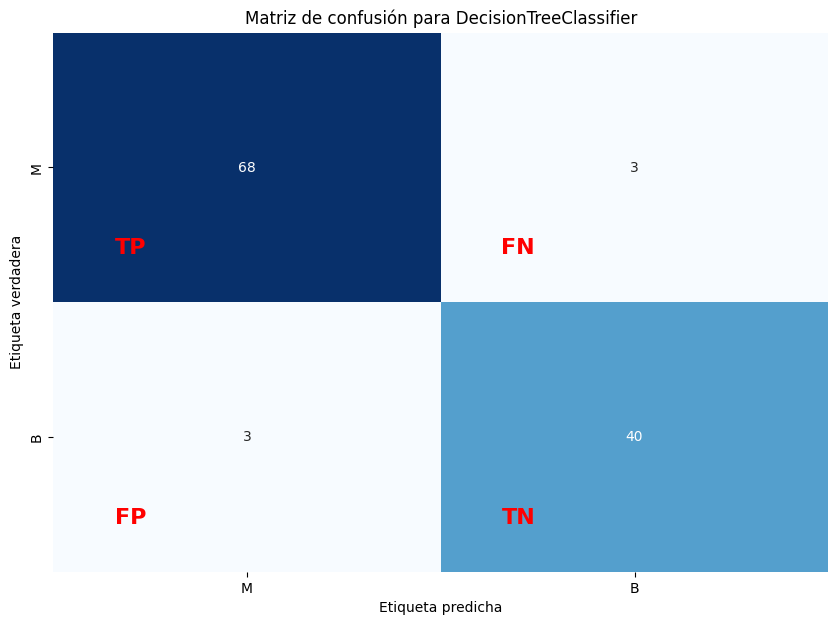

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_dt = dt_pipe.predict(X_test)
confusion_matrix_dt= confusion_matrix(y_test, y_pred_dt)

# Crear un gráfico de calor (heatmap) para visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión para DecisionTreeClassifier')
labels = np.array([['TP', 'FN'], ['FP', 'TN']])
offset = 0.2  # Ajusta la posición de las etiquetas en la esquina de cada celda

for i in range(2):
    for j in range(2):
        plt.text(j + offset, i + (1 - offset), labels[i, j],
                 fontsize=16, fontweight='bold', ha='center', va='center', color='red')

plt.show()


3) ¿Cuántos falsos positivos había?

3

4) ¿Cuántos falsos negativos había?

3

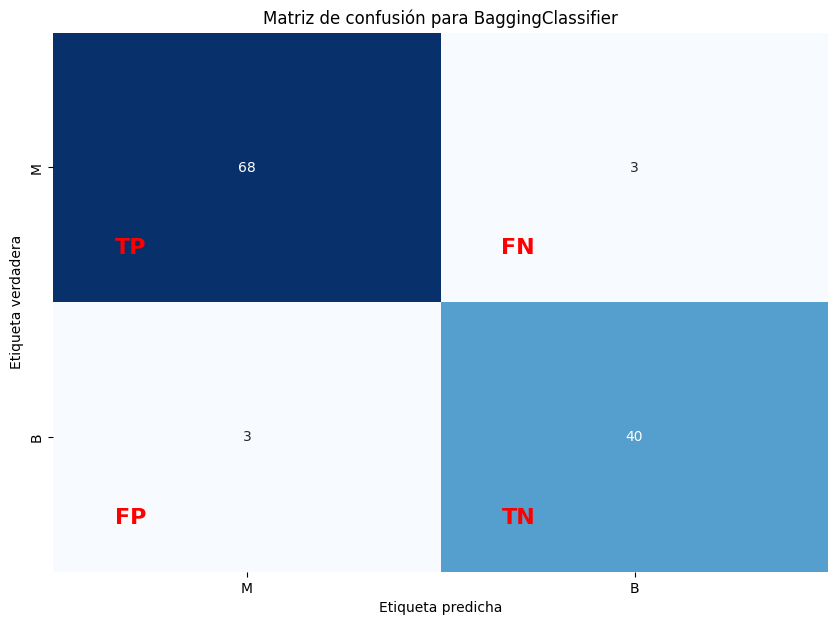

In [65]:
y_pred_bc = bc_pipe.predict(X_test)
confusion_matrix_bc = confusion_matrix(y_test, y_pred_dt)

# Crear un gráfico de calor (heatmap) para visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_bc, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión para BaggingClassifier')
labels = np.array([['TP', 'FN'], ['FP', 'TN']])
offset = 0.2  # Ajusta la posición de las etiquetas en la esquina de cada celda

for i in range(2):
    for j in range(2):
        plt.text(j + offset, i + (1 - offset), labels[i, j],
                 fontsize=16, fontweight='bold', ha='center', va='center', color='red')

plt.show()


3) ¿Cuántos falsos positivos había?

3

4) ¿Cuántos falsos negativos había?

3

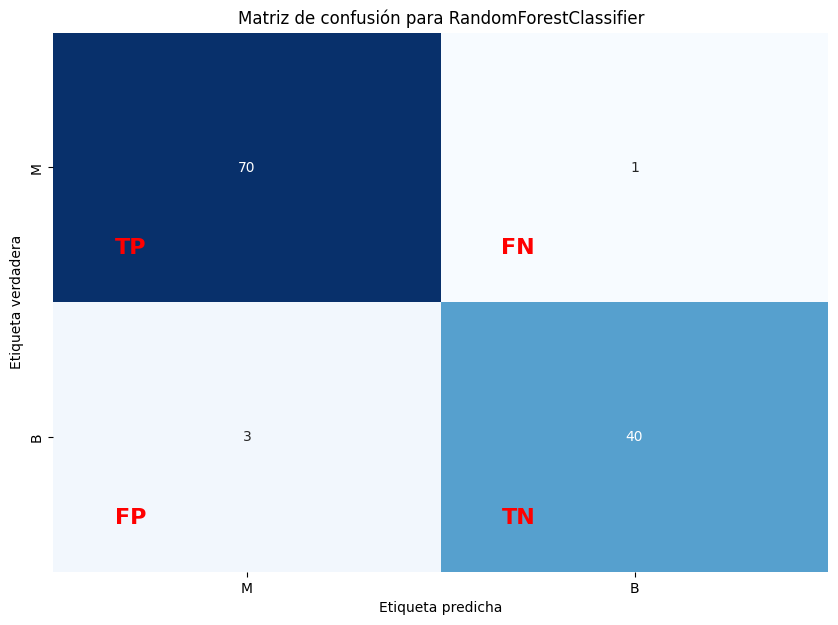

In [66]:

y_pred_rfc = rfc_pipe.predict(X_test)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Crear un gráfico de calor (heatmap) para visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión para RandomForestClassifier')
labels = np.array([['TP', 'FN'], ['FP', 'TN']])
offset = 0.2  # Ajusta la posición de las etiquetas en la esquina de cada celda

for i in range(2):
    for j in range(2):
        plt.text(j + offset, i + (1 - offset), labels[i, j],
                 fontsize=16, fontweight='bold', ha='center', va='center', color='red')

plt.show()




3) ¿Cuántos falsos positivos había?

1

4) ¿Cuántos falsos negativos había?

3




5) Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.

Falso Negativo: 

Un falso negativo en el contexto del cáncer de mama significa que el modelo predice que una paciente no tiene cáncer cuando en realidad sí lo tiene. Esto puede ser peligroso porque puede retrasar el tratamiento y poner en riesgo la vida del paciente. 